# Stock price prediction using linear regression

For this project, we'll be using the quandl API to source stock data then apply a simple linear regression model for price prediction

In [1]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

## Gather quandl data

In [2]:
quandl.ApiConfig.api_key = "9SrxnSudqVNT5x1i8_cm"

In [3]:
# we're using the wiki service
df = quandl.get("WIKI/TSLA")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [4]:
# select adjusted close price for further analysis
df = df[["Adj. Close"]]

In [5]:
df.head()

,Adj. Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11


## Process data

### Visualise the dataset

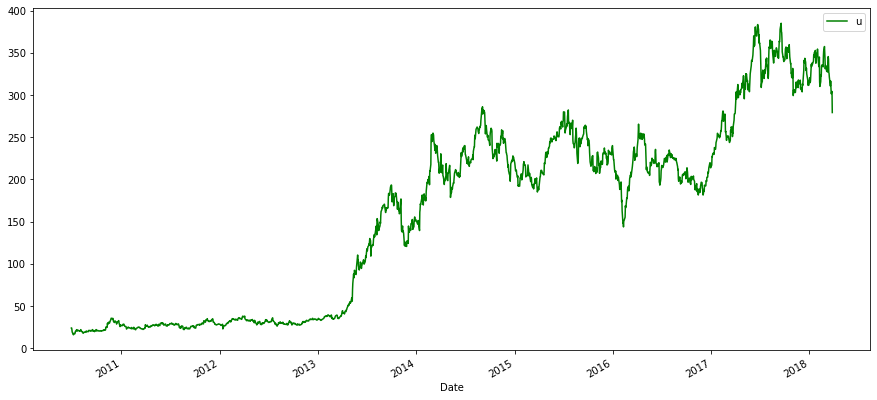

In [6]:
df.plot(figsize=(15, 7), color="g")
plt.legend("upper left")
plt.show()

### Create training and validation sets

In [7]:
forecast = 30
df["Prediction"] = df[["Adj. Close"]].shift(-forecast)
df

,Adj. Close,Prediction
Date,,
2010-06-29,23.89,17.90
2010-06-30,23.83,17.60
2010-07-01,21.96,18.32
2010-07-02,19.20,18.78
2010-07-06,16.11,19.15
...,...,...
2018-03-21,316.53,NaN
2018-03-22,309.10,NaN
2018-03-23,301.54,NaN


In [8]:
# drop the Prediction columnn
X = np.array(df.drop(['Prediction'], 1))
# standardise data (mean 0, std 1)
X = preprocessing.scale(X)

# adj. close feature
# use last 30 days for validation
X_predict = X[-forecast:]  
# exclude last 30 days for training
X = X[:-forecast]  

# target
y = df['Prediction']
# exclude last 39 days for training
y = y[:-forecast]